In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')

Saving data.csv to data (5).csv


In [ ]:
df.head(7)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.shape

(569, 33)

In [ ]:
df.isnull().any()

,0
id,False
diagnosis,False
radius_mean,False
texture_mean,False
perimeter_mean,False
area_mean,False
smoothness_mean,False
compactness_mean,False
concavity_mean,False
concave points_mean,False


In [ ]:
df.dropna(axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df.shape

(569, 32)

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


<Axes: xlabel='count', ylabel='diagnosis'>

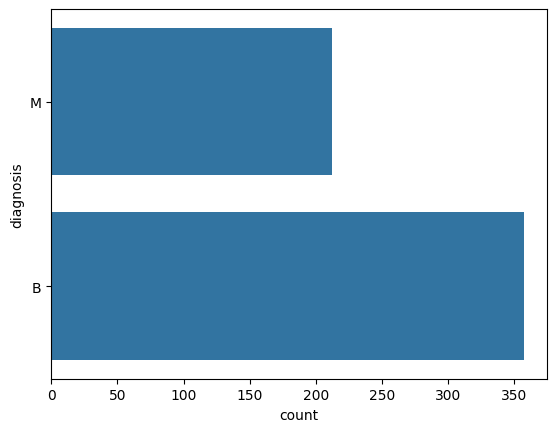

In [ ]:
sns.countplot(df['diagnosis'])

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [ ]:
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


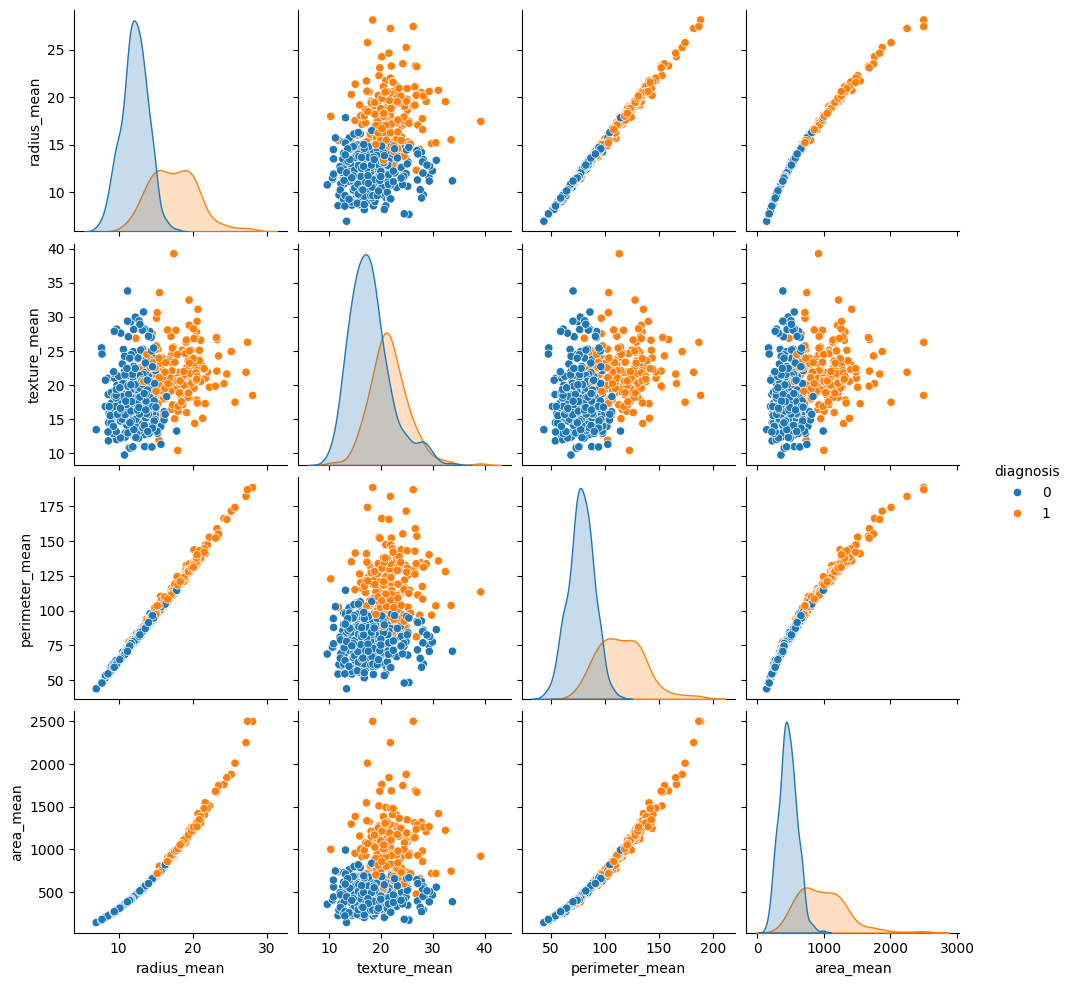

In [ ]:
sns.pairplot(df.iloc[:,1:6], hue='diagnosis')
plt.show()

In [ ]:
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


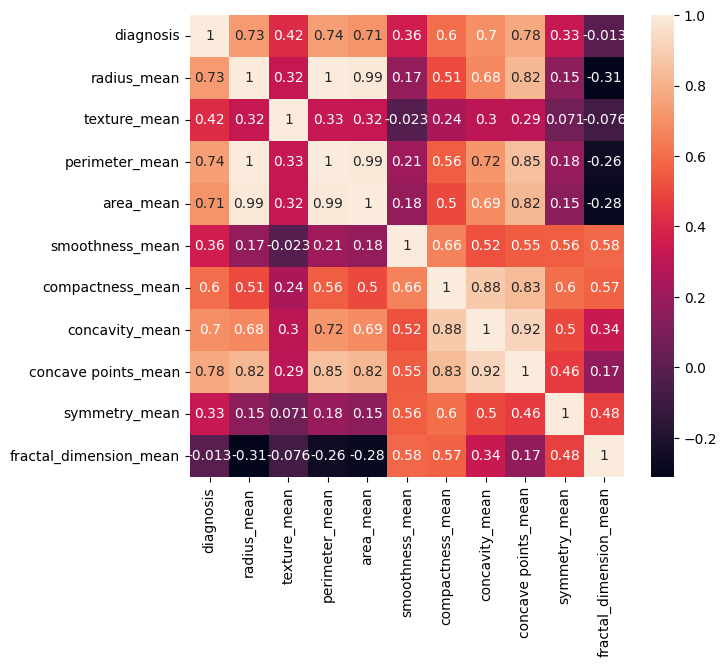

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True)
plt.show()

In [ ]:
X = df.iloc[:,2:].values
y = df.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
def models(X_train, y_train):
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train, y_train)

  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
  knn.fit(X_train, y_train)

  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
  tree.fit(X_train, y_train)

  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train, y_train)

  print('[0]Logistic Regression Training Accuracy', log.score(X_train, y_train))
  print('[1]K Nearest Neighbor Training Accuracy', knn.score(X_train, y_train))
  print('[2]Decision Tree Training Accuracy', tree.score(X_train, y_train))
  print('[3]Random Forest Training Accuracy', forest.score(X_train, y_train))

  return log, knn, tree, forest


In [ ]:
log, knn, tree, forest = models(X_train, y_train)

[0]Logistic Regression Training Accuracy 0.989010989010989
[1]K Nearest Neighbor Training Accuracy 0.978021978021978
[2]Decision Tree Training Accuracy 1.0
[3]Random Forest Training Accuracy 0.9978021978021978


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, forest.predict(X_test))
cm

array([[66,  1],
       [ 2, 45]])

In [ ]:
print('accuracy :', (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))

accuracy : 0.9736842105263158


In [ ]:
cm = confusion_matrix(y_test, log.predict(X_test))
cm

array([[65,  2],
       [ 2, 45]])

In [ ]:
print('accuracy :', (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))


accuracy : 0.9649122807017544


In [ ]:
cm = confusion_matrix(y_test, tree.predict(X_test))
cm

array([[62,  5],
       [ 3, 44]])

In [ ]:
print('accuracy :', (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))

accuracy : 0.9298245614035088


In [ ]:
cm = confusion_matrix(y_test, knn.predict(X_test))
cm

array([[67,  0],
       [ 5, 42]])

In [ ]:
print('accuracy :', (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]))

accuracy : 0.956140350877193


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [ ]:
print(classification_report(y_test, knn.predict(X_test)))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
print(classification_report(y_test, tree.predict(X_test)))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94        67
           1       0.90      0.94      0.92        47

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
print(classification_report(y_test, log.predict(X_test)))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate on Training Data
y_train_pred = forest.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print('Training Classification Report:')
print(classification_report(y_train, y_train_pred))

Training Accuracy: 99.78%
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       290
           1       1.00      0.99      1.00       165

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455

